 # Intensity Resolution Definition

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
def calculate_requirement_curve(pe, nsb, window_width, electronic_noise, miscal, enf):
    """
    Equation for calculating the Goal and Requirement curves, as used in the CTA requirement

    Parameters
    ----------
    pe : ndarray
        Number of photoelectrons (p.e.)
    nsb : float
        NSB rate (MHz)
    window_width : float
        Integration window width (ns)
    electronic_noise : float
        Charge Stddev due to integrated electronic noise (p.e.)
    miscal : float
        Multiplicative errors of the gain.
    enf : float
        Excess noise factor.
    """
    var_noise = nsb * window_width + electronic_noise**2
    var_enf = (1 + enf)**2 * pe
    var_miscal = (miscal * pe)**2
    sigma_q = np.sqrt(var_noise + var_enf + var_miscal)
    return sigma_q / pe

In [4]:
def calculate_requirement_nominal_nsb(pe):
    return calculate_requirement_curve(
        pe,
        nsb=0.125,
        window_width=15,
        electronic_noise=0.87,
        miscal=0.1,
        enf=0.2,
    )

In [5]:
def calculate_requirement_high_nsb(pe):
    return calculate_requirement_curve(
        pe,
        nsb=1.25,
        window_width=15,
        electronic_noise=0.87,
        miscal=0.1,
        enf=0.2,
    )

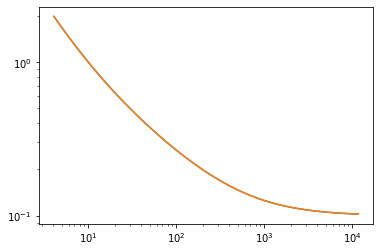

In [54]:
x, y = np.loadtxt("IntensityRes.txt", unpack=True)
plt.plot(x, y)
plt.xscale("log")
plt.yscale("log")

ph = x
requirement_pde = 0.25
pe = ph * requirement_pde
req_nominal_nsb = calculate_requirement_nominal_nsb(pe)
plt.plot(ph, req_nominal_nsb)
np.testing.assert_allclose(y, req_nominal_nsb, rtol=1e-5)

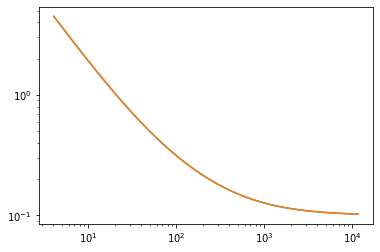

In [55]:
x, y = np.loadtxt("IntensityResHighNSB.txt", unpack=True)
plt.plot(x, y)
plt.xscale("log")
plt.yscale("log")

ph = x
requirement_pde = 0.25
pe = ph * requirement_pde
req_high_nsb = calculate_requirement_high_nsb(pe)
plt.plot(ph, req_high_nsb)
np.testing.assert_allclose(y, req_high_nsb, rtol=1e-5)

The underlying formula for the requirement curves are demonstrated here. The formula used here defines the Intensity Resolution at an intensity $I$ as the Charge Resolution at a charge of $I \times \epsilon_{PDE}$, where a nominal PDE of $\epsilon_{PDE} = 0.25$ is used. 

There are two equivalent formula which therefore describe the Fractional Intensity Resolution:

$$\frac{\sigma_{I_T}}{I_T} = \frac{1}{I_T} \sqrt{\frac{\sum_{i=0}^N (I_{M_i} - I_T)^2}{N}}$$

Where $I_{M_i}$ are individual measurements of the intensity in photons of a true intensity $I_T$, and

$$\frac{\sigma_{I_T=\frac{Q_T}{\epsilon_{PDE}}}}{Q_T} = \frac{1}{Q_T} \sqrt{\frac{\sum_{i=0}^N (Q_{M_i} - Q_T)^2}{N}}$$

Where $Q_{M_i}$ are individual measurements of the charge (p.e.) of a true charge $Q_T$. The equivalence is demonstrated below difference between the two definitions is explored below:

In [27]:
amplitude_pe = 50
charge_pe = np.random.normal(amplitude_pe, 10, 100000)
res_pe = charge_pe.std()

amplitude_ph = amplitude_pe / requirement_pde

charge_ph = charge_pe / requirement_pde
res_ph = charge_ph.std()


print(f"Charge Resolution at Q = {amplitude_pe} p.e. is {res_pe/amplitude_pe:.2f}")
print(f"Intensity Resolution at I={amplitude_ph} photons using Equation 1 is {res_ph / amplitude_ph:.2f}")
print(f"Intensity Resolution at I={amplitude_ph} photons using Equation 2 is {res_pe / amplitude_pe:.2f}")

Charge Resolution at Q = 50 p.e. is 0.20
Intensity Resolution at I=200.0 photons using Equation 1 is 0.20
Intensity Resolution at I=200.0 photons using Equation 2 is 0.20
